In [5]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, datetime, warnings
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Tue Jan 17 21:25:33 2023


In [6]:
sns.set_context('paper')
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')

In [8]:
# read bottom topography data
etopo = xr.open_dataset('../Bottom_water_BGC/data/etopo5.nc', chunks='auto')
etopo['bath'] = etopo.bath.where(etopo.bath<0) # ocean points only
etopo = etopo.isel(X=slice(3100,4000), Y=slice(1300,1700)) # subset data to make things faster

In [7]:
df_bottle_dic = pd.read_csv('data/bottle_data_DIC_prepared.csv', parse_dates=['Date'], index_col=0, na_values=['<undefined>',-9999.])
df_bottle_dic = df_bottle_dic.loc[df_bottle_dic.Oxygen_flag.isin([2, 6])]
df_bottle_dic = df_bottle_dic.loc[df_bottle_dic.Oxygen.notnull()]

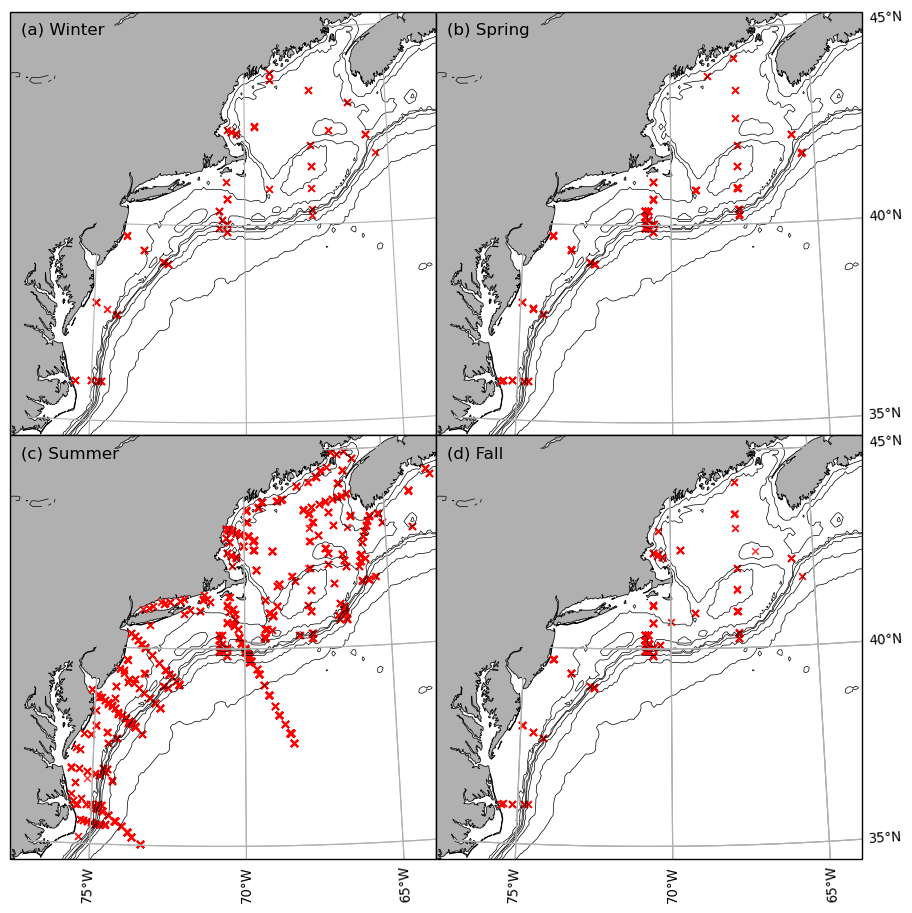

In [14]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature

minlon, maxlon = 282.5, 296
minlat, maxlat =  34.5, 45.25
lonc, latc = (minlon + maxlon)/2., (minlat + maxlat)/2.
isobaths = [-3000, -2000, -1000, -500, -250, -100, -50]

proj = ccrs.EquidistantConic(central_longitude=lonc, central_latitude=latc)
dpi = 600
fig, axs = plt.subplots(2, 2, subplot_kw={'projection':proj}, figsize=(11,11))
fig.subplots_adjust(hspace=0, wspace=0)

for ax, s, l in zip(axs.ravel(), ['winter','spring','summer','fall'], ['(a) ','(b) ','(c) ','(d) ']):
    ax.set_extent([minlon, maxlon, minlat, maxlat])
    _ = ax.add_feature(cfeature.LAND, zorder=1, facecolor='#b0b0b0')
    _ = ax.coastlines(linewidth=0.5, zorder=1)
    _ = ax.gridlines(xlocs=np.arange(-180,180,5),ylocs=np.arange(0,90,5), draw_labels=False)
    _ = ax.contour(etopo.X, etopo.Y, etopo.bath, isobaths, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
    df = df_bottle_dic[df_bottle_dic.Season==s]
    _ = ax.scatter(df.Longitude, df.Latitude, c='red', marker='x', transform=ccrs.PlateCarree(), alpha=0.75)
    _ = ax.text(0.025, 0.975, l + s.capitalize(), ha='left', va='top', transform=ax.transAxes, fontsize=12)

for ax in axs[:,-1]:
    _ = ax.gridlines(xlocs=np.arange(-180,180,5), ylocs=np.arange(0,90,5), draw_labels={'right': 'y'})

for ax in axs[-1,:]:
    _ = ax.gridlines(xlocs=np.arange(-180,180,5), ylocs=np.arange(0,90,5), draw_labels={'bottom': 'x'})